<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_0_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-0.4_n20.csv',
 'data_multi_delta_-0.4_n30.csv',
 'data_multi_delta_-0.4_n60.csv',
 'data_multi_delta_-0.4_n120.csv',
 'data_multi_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-0.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,27.648901,87.902601,0.096013,125.647515,125.464223,0.183292
1,0.0,1.0,65.012282,95.197327,-0.443171,169.766439,170.116398,-0.349960
2,0.0,2.0,62.053754,46.302357,0.159641,118.515752,118.373819,0.141933
3,0.0,3.0,30.567107,56.031187,0.814208,97.412502,96.584709,0.827793
4,0.0,4.0,32.729916,85.941258,-0.205068,128.466106,128.589839,-0.123733
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,24.456428,70.867756,-0.428216,104.895968,105.304210,-0.408242
119996,999.0,116.0,52.217457,27.256879,-0.096021,89.378315,89.496389,-0.118074
119997,999.0,117.0,62.596338,59.207832,-0.552344,131.251827,131.796308,-0.544482
119998,999.0,118.0,54.222279,57.886689,0.189870,122.298837,122.102117,0.196721


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,27.648901,87.902601,0.096013,125.647515,125.464223,0.183292
1,0.0,1.0,65.012282,95.197327,-0.443171,169.766439,170.116398,-0.349960
2,0.0,2.0,62.053754,46.302357,0.159641,118.515752,118.373819,0.141933
3,0.0,3.0,30.567107,56.031187,0.814208,97.412502,96.584709,0.827793
4,0.0,4.0,32.729916,85.941258,-0.205068,128.466106,128.589839,-0.123733
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,24.456428,70.867756,-0.428216,104.895968,105.304210,-0.408242
119996,999.0,116.0,52.217457,27.256879,-0.096021,89.378315,89.496389,-0.118074
119997,999.0,117.0,62.596338,59.207832,-0.552344,131.251827,131.796308,-0.544482
119998,999.0,118.0,54.222279,57.886689,0.189870,122.298837,122.102117,0.196721


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    27.648901  87.902601  0.096013  125.647515  125.464223  0.183292
      1.0    65.012282  95.197327 -0.443171  169.766439  170.116398 -0.349960
      2.0    62.053754  46.302357  0.159641  118.515752  118.373819  0.141933
      3.0    30.567107  56.031187  0.814208   97.412502   96.584709  0.827793
      4.0    32.729916  85.941258 -0.205068  128.466106  128.589839 -0.123733
...                ...        ...       ...         ...         ...       ...
999.0 115.0  24.456428  70.867756 -0.428216  104.895968  105.304210 -0.408242
      116.0  52.217457  27.256879 -0.096021   89.378315   89.496389 -0.118074
      117.0  62.596338  59.207832 -0.552344  131.251827  131.796308 -0.544482
      118.0  54.222279  57.886689  0.189870  122.298837  122.102117  0.196721
      119.0  65.243438  30.653922 -0.410407  105.486953  105.916573 -0.429620

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    27.648901  87.902601  0.096013  125.647515  125.464223  0.183292
      1.0    65.012282  95.197327 -0.443171  169.766439  170.116398 -0.349960
      2.0    62.053754  46.302357  0.159641  118.515752  118.373819  0.141933
      3.0    30.567107  56.031187  0.814208   97.412502   96.584709  0.827793
      4.0    32.729916  85.941258 -0.205068  128.466106  128.589839 -0.123733
...                ...        ...       ...         ...         ...       ...
999.0 115.0  24.456428  70.867756 -0.428216  104.895968  105.304210 -0.408242
      116.0  52.217457  27.256879 -0.096021   89.378315   89.496389 -0.118074
      117.0  62.596338  59.207832 -0.552344  131.251827  131.796308 -0.544482
      118.0  54.222279  57.886689  0.189870  122.298837  122.102117  0.196721
      119.0  65.243438  30.653922 -0.410407  105.486953  105.916573 -0.429620

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,27.648901,87.902601,0.096013,125.647515,125.464223,0.183292
1,0.0,1.0,65.012282,95.197327,-0.443171,169.766439,170.116398,-0.349960
2,0.0,2.0,62.053754,46.302357,0.159641,118.515752,118.373819,0.141933
3,0.0,3.0,30.567107,56.031187,0.814208,97.412502,96.584709,0.827793
4,0.0,4.0,32.729916,85.941258,-0.205068,128.466106,128.589839,-0.123733
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,24.456428,70.867756,-0.428216,104.895968,105.304210,-0.408242
119996,999.0,116.0,52.217457,27.256879,-0.096021,89.378315,89.496389,-0.118074
119997,999.0,117.0,62.596338,59.207832,-0.552344,131.251827,131.796308,-0.544482
119998,999.0,118.0,54.222279,57.886689,0.189870,122.298837,122.102117,0.196721


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    27.648901  87.902601  0.096013  125.647515  125.464223  0.183292
      1.0    65.012282  95.197327 -0.443171  169.766439  170.116398 -0.349960
      2.0    62.053754  46.302357  0.159641  118.515752  118.373819  0.141933
      3.0    30.567107  56.031187  0.814208   97.412502   96.584709  0.827793
      4.0    32.729916  85.941258 -0.205068  128.466106  128.589839 -0.123733
...                ...        ...       ...         ...         ...       ...
999.0 115.0  24.456428  70.867756 -0.428216  104.895968  105.304210 -0.408242
      116.0  52.217457  27.256879 -0.096021   89.378315   89.496389 -0.118074
      117.0  62.596338  59.207832 -0.552344  131.251827  131.796308 -0.544482
      118.0  54.222279  57.886689  0.189870  122.298837  122.102117  0.196721
      119.0  65.243438  30.653922 -0.410407  105.486953  105.916573 -0.429620

[120000 rows x 6 columns]

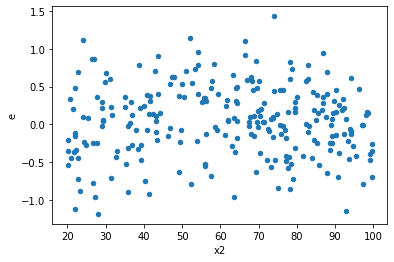

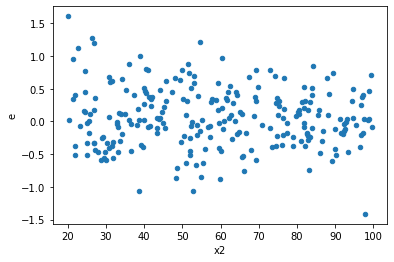

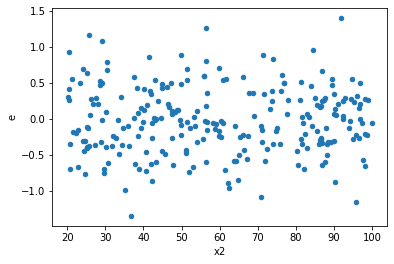

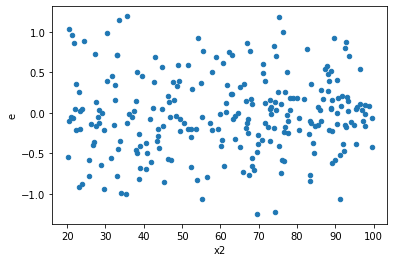

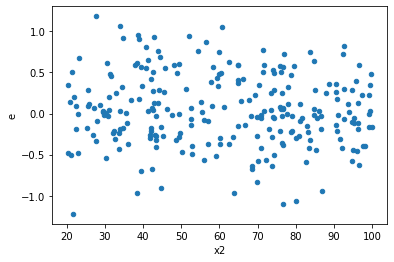

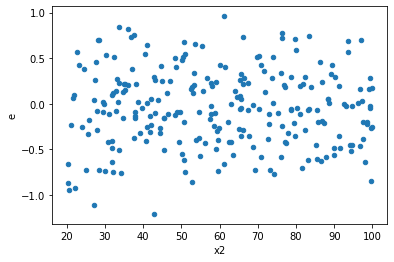

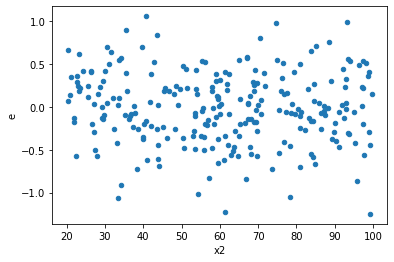

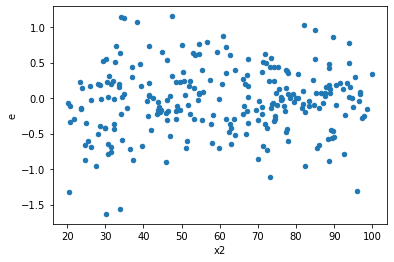

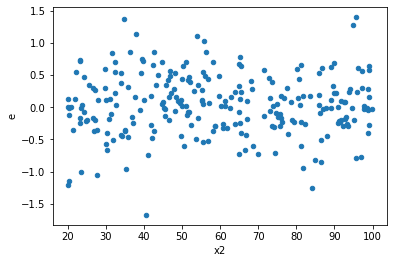

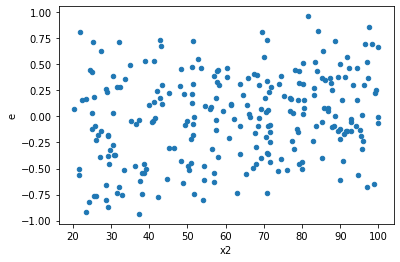

In [ ]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,46.0,46.0,5.110593198689166,8.932494760053395,0.11109985214541665,0.19418466869681292,1.7478391280183525,0.06129797447177299,0.9693510127641135,0.030648987235886493,Reject001=1 : Homoscedasticity
4.0,46.0,46.0,7.618554180935144,12.131949828013838,0.16562074306380747,0.2637380397394313,1.5924215461213267,0.11822789324168514,0.9408860533791574,0.05911394662084257,Reject001=1 : Homoscedasticity
7.0,46.0,46.0,9.841454975206084,10.910337860433858,0.2139446733740453,0.23718125783551863,1.108610250000701,0.7280790167656703,0.6359604916171648,0.36403950838283516,Reject001=1 : Homoscedasticity
11.0,46.0,46.0,7.493828287779883,9.352941999106799,0.1629093106039105,0.2033248260675391,1.2480859768776067,0.45525155634964687,0.7723742218251766,0.22762577817482343,Reject001=1 : Homoscedasticity
21.0,46.0,46.0,8.641697920317782,9.926370758755143,0.18786299826777786,0.21579066866859006,1.1486597715267186,0.6403079210337648,0.6798460394831176,0.3201539605168824,Reject001=1 : Homoscedasticity
29.0,46.0,46.0,7.979575514409802,9.154541845135288,0.17346903292195223,0.19901177924207147,1.1472467211574964,0.6432772393850557,0.6783613803074722,0.3216386196925278,Reject001=1 : Homoscedasticity
35.0,46.0,46.0,7.769042217953872,8.499180533099409,0.168892222129432,0.18476479419781325,1.093980479789159,0.7619640256411708,0.6190179871794146,0.3809820128205854,Reject001=1 : Homoscedasticity
38.0,46.0,46.0,9.095561064121386,10.76771056701952,0.1977295883504649,0.23408066450042436,1.1838423700429153,0.5694414952010485,0.7152792523994758,0.28472074760052424,Reject001=1 : Homoscedasticity
55.0,46.0,46.0,6.8310349106936545,9.576959187101792,0.14850075892812292,0.20819476493699549,1.4019777840850332,0.2555667802280348,0.8722166098859826,0.1277833901140174,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,11.674827947978846,9.005273131831586,0.25380060756475753,0.19576680721373013,0.7713409715293136,0.3818784106347161,Reject001=1 : Homoscedasticity
1.0,46.0,46.0,12.040861288644319,5.875359210279617,0.26175785410096347,0.12772520022346995,0.4879517394507851,0.01661989876912402,Reject001=1 : Homoscedasticity
2.0,46.0,46.0,5.110593198689166,8.932494760053395,0.11109985214541665,0.19418466869681292,1.7478391280183525,0.06129797447177299,Reject001=1 : Homoscedasticity
3.0,46.0,46.0,10.931822759940996,8.040107202629066,0.23764832086828253,0.1747849391875884,0.7354772739356471,0.3010313684398775,Reject001=1 : Homoscedasticity
4.0,46.0,46.0,7.618554180935144,12.131949828013838,0.16562074306380747,0.2637380397394313,1.5924215461213267,0.11822789324168514,Reject001=1 : Homoscedasticity
5.0,46.0,46.0,11.539150063276765,8.506479821068886,0.25085108833210357,0.18492347437106274,0.737184261788975,0.3046793280462586,Reject001=1 : Homoscedasticity
6.0,46.0,46.0,10.279745925134305,7.155599762016413,0.22347273750291968,0.1555565165655742,0.6960872198719177,0.22299770804473962,Reject001=1 : Homoscedasticity
7.0,46.0,46.0,9.841454975206084,10.910337860433858,0.2139446733740453,0.23718125783551863,1.108610250000701,0.7280790167656703,Reject001=1 : Homoscedasticity
8.0,46.0,46.0,9.545782027655983,9.47794608763557,0.20751700060121703,0.20604230625294714,0.9928936215153582,0.9808096635365684,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      916
Reject001=0 : Heteroscedasticity     84
Name: Result_test, dtype: int64